**Step 0**

The dataset is from one of the Big Mart firms, across outlets with information about the stores such as location and size, product features such as weight, category, fat content, and other metrics dealing with historical sales data. Using all of this information, the end goal is to forecast the sales of different products in the stores.

**Step 1.1**
*   Possibility of finding versions of the data ✅
*   Possibility of change in the data ✅
*   Possibility of receiving future updates on the data ✅
*   Have at least two protected features ✅

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Training data
train_data = pd.read_csv('train.csv')

**Step 1.2**

ML Metrics
* The accuracy of prediction of sales.
* Minimum number of features necessary to give a nearly unaffected performance.
* Model performance (Example: Root Mean Square Error).

**Step 1.3**

Business Metrics
* Product with most demand and the correlation with re-location to improve the demand.
* Array of factors influencing the churn of products.

**Step 1.4**

Software Metrics
* Array of dependencies and their stability, followed by the size of the dependencies.
* Memory performance for the pre-processing of the data.
* CPU utilization for training the model.

**Step 2.1**

The dataset depicts a real-world scenario among big mart firms like Walmart and Sobeys. Further on how different features affect the decision to manage the inventory better and, more importantly, distribution of inventory based on such features. Not to mention the details of features covers a range of type, including categorical, binary, numerical, both scaled, and those that need to be normalized. Hence taking the requirement into consideration that the dataset correlates well for the examination.

In [3]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(r=[2, 3, 3, 2],
theta=['timeliness','versioning','distribution',
'null values']))

fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

**Step 2.2**

Since the dataset is almost close to the same scale, normalization may not be necessary. Furthermore, given the number of categorical features, which are converted to binary fields, the radar chart does not have a lot of options or variables to plot, as the very point is to use multiple quantitative variables. Taking one such example, below is the plot - which is well backed in the feature importance of the random tree forest algorithm. Lastly, after using onehotencoders, though the number of features crosses 40, the features which strongly contribute to prediction is less than 10 (Step 4).

As far as the quality is concerned, the missing/null values are fairly less in the data set, and the features with null values are not prominent. Especially in features such as age and stores, the distribution is almost ideal for a relatively small dataset.

In [4]:
labels=np.array(['Item_Weight', 'Item_MRP', 'Consumer_Age', 'Consumer_Gender'])
stats=train_data.loc[386 ,labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

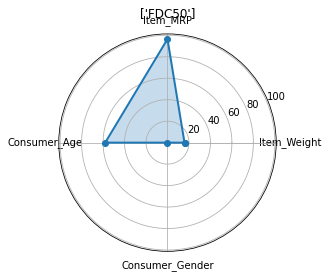

In [5]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title([train_data.loc[386, "Item_Identifier"]])
ax.grid(True)

**Step 2.3**

* Data Uploaded ✅
* [Link to Data](https://git.cs.dal.ca/adimurthy/adesh_nalpet_adimurthy_b00886154_csci5901/-/tree/main/A1)



In [6]:
# List NULL values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Consumer_Age                    0
Consumer_Gender                 0
dtype: int64

In [7]:
# Fill missing values with mean
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0],inplace=True)

**Step 3**

The target variable is Item_Outlet_Sales. While the list of all the features is already displayed above, some of the characteristics are as follows: 
* Item_Weight and Outlet_Size have missing fields. Since they have continuous values, the missing fields are filled with the mean value.
* Outlet_Size is a categorical variable, and hence missing values are replaced by the mode of the column.
* A few other categorical variables are: Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, and Outlet_Type
* Finally, to ensure the scale of values of a variable is within a range, the StandardScaler function is used to normalize the data.

A Complete list of variables and target in the dataset:

|Variable|	Description|
| --- | --- |
|Item_Identifier|	Unique product ID|
|Item_Weight|	Weight of product|
|Item_Fat_Content|	Whether the product is low fat or not|
|Item_Visibility|	The % of total display area of all products in a store |allocated| to the particular product|
|Item_Type|	The category to which the product belongs|
|Item_MRP|	Maximum Retail Price (list price) of the product|
|Outlet_Identifier|	Unique store ID|
|Outlet_Establishment_Year|	The year in which store was established|
|Outlet_Size|	The size of the store in terms of ground area covered|
|Outlet_Location_Type|	The type of city in which the store is located|
|Outlet_Type|	Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|	Sales of the product in the particular store. This is the outcome variable to be predicted.|
|Consumer_Age|Average age of the consumer|
|Consumer_Gender|Majority gender of the consumer|

In [8]:
import category_encoders as ce
# Binary Encoder
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'], use_cat_names=True)
train_data = OHE.fit_transform(train_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Reshape/Scale
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))
train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Seperate Features and Target
train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

# Split to Train to Train and Test
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6392, 47), (2131, 47), (6392,), (2131,))

In [11]:
# Linear Regression
model_LR = LinearRegression()

model_LR.fit(train_x, train_y)

predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)

print('RMSE Train: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE Test: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE Train:  1120.3309637446057
RMSE Test:  1148.5518591407933


In [12]:
# Random Forest
model_RFR = RandomForestRegressor(max_depth=10)

model_RFR.fit(train_x, train_y)

predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

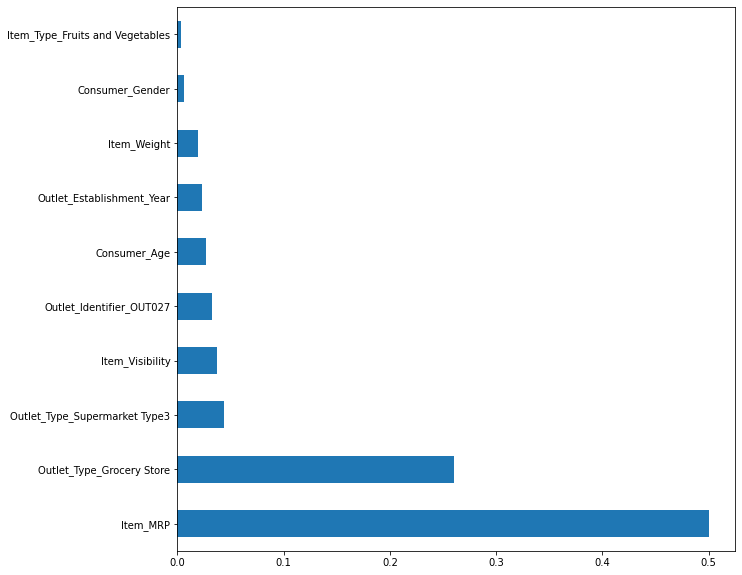

In [13]:
plt.figure(figsize=(10, 10))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(10).plot(kind='barh');

**Step 4**

**Feature Importance**: After building a prototype model with a random forest algorithm, which also gives the "feature importance" of all the different variables, the next step is to choose the top 5-10 features among the 45+ features (binary encoders result in a bigger feature set) such that the performance is unaffected to train the model: validated by comparing the performance with and without the less important features.

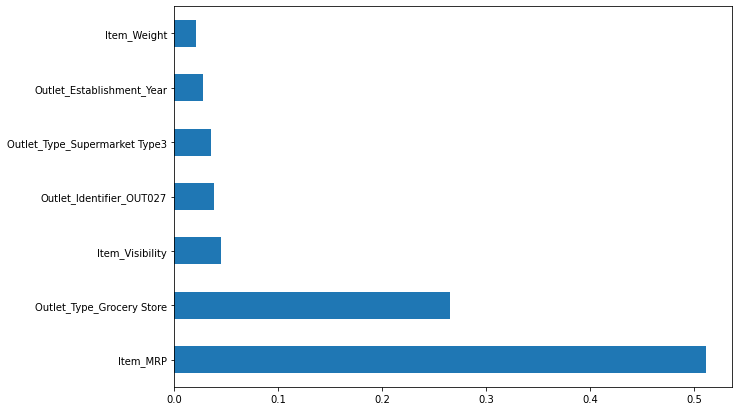

In [14]:
# Seperate Features and Target - Step #6 re-iteration.
train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales', 'Consumer_Age', 'Consumer_Gender'])
train_Y = train_data['Item_Outlet_Sales']

# Split to Train to Train and Test
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

model_RFR = RandomForestRegressor(max_depth=10)

model_RFR.fit(train_x, train_y)

predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

plt.figure(figsize=(10, 7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');

**Step 4**

The top 7 features with more predictive value:
* Item_Weight
* Outlet_Identifier_OUT027
* Outlet_Establishment_Year
* Outlet_Type_Supermarket_Type3
* Item_Visibility
* Outlet_Type_Grocery_Store
* Item_MRP

**Step 5**

**Protected Features**: However, to prevent bias in the model, despite the feature importance, the **consumer age**, and **gender**, especially when it represents average and majority numbers, it's undoubtedly known to create bias in the model.

**Step 6**

Training the random forest model with the top predictive features.

In [15]:
top_7 = ['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']

train_x_top = train_x[top_7]
test_x_top = test_x[top_7]


model_RFR_with_top = RandomForestRegressor(max_depth=10,random_state=2)

model_RFR_with_top.fit(train_x_top, train_y)

predict_train_with_top = model_RFR_with_top.predict(train_x_top)
predict_test_with_top = model_RFR_with_top.predict(test_x_top)

print('RMSE Train: ', mean_squared_error(train_y, predict_train_with_top)**(0.5))
print('RMSE Test: ',  mean_squared_error(test_y, predict_test_with_top)**(0.5))

RMSE Train:  899.8582438552843
RMSE Test:  1117.7016540152065


Important to note that using only the Top 7 features gives almost the same performance as that of 45+ features.

**Step 7**

Starting with the straightforward linear regression, the training dataset is randomly split into 25-75 (Validation Set - Training Set), and performance is measured on the validation set. The Root Mean Square Error (RMSE) is high for training and validation sets. After checking if a tree-based model performs any better, the **random forest** model showed significant improvements in the RMSE values.

**Step 8**

As seen above, the performance of the model is approximately 87% in predicting the sales, the most predictive feature (feature selection) is as mentioned in Step 4, and finally, the random forest model significantly reduces the RMSE value, as seen in step 6.

In [16]:
import colab
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install --upgrade 'tensorflow_data_validation[visualization]<2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
print('TF version:', tf.__version__)
print('TFDV version:', tfdv.version.__version__)

TF version: 2.8.2
TFDV version: 1.8.0


In [19]:
import pkg_resources
import importlib
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

**Step 9**

**Error Analysis**: After visualizing the statistics, the errors are mostly because of missing values and the percentage of zeroes in the protected field, such as gender. However, it's a categorical field, where 0 represents a type of gender. All of which are fixed by re-iterating in step 3.

In [20]:
stats = tfdv.generate_statistics_from_csv('train.csv')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [21]:
tfdv.visualize_statistics(stats)

In [22]:
schema = tfdv.infer_schema(statistics=stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Item_Identifier',BYTES,required,,-
'Item_Weight',FLOAT,optional,single,-
'Item_Fat_Content',STRING,required,,'Item_Fat_Content'
'Item_Visibility',FLOAT,required,,-
'Item_Type',STRING,required,,'Item_Type'
'Item_MRP',FLOAT,required,,-
'Outlet_Identifier',STRING,required,,'Outlet_Identifier'
'Outlet_Establishment_Year',INT,required,,-
'Outlet_Size',STRING,optional,single,'Outlet_Size'


,Values
Domain,
'Item_Fat_Content',"'LF', 'Low Fat', 'Regular', 'low fat', 'reg'"
'Item_Type',"'Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'"
'Outlet_Identifier',"'OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049'"
'Outlet_Size',"'High', 'Medium', 'Small'"
'Outlet_Location_Type',"'Tier 1', 'Tier 2', 'Tier 3'"
'Outlet_Type',"'Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'"


**Step 10**

Using the random forest model, the age topped the feature importance, and the gender topped among the categorical variables leading to an accuracy of ~58% with a higher RMSE (steps 3 and 4). Not to mention, it has a high correlation with the item_type_household binary encoder.

In [23]:
anomalies = tfdv.validate_statistics(statistics=stats, schema=schema)
tfdv.display_anomalies(anomalies)

**Step 11**

A pipeline with all the above considerations:
* Get outlet binary columns
* Pre-processing:
  * Drop columns
  * Fill missing values
  * Scale and Normalize the data
* Train the random forest model

In [24]:
# Imports
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [25]:
# Training dataset
data = pd.read_csv('train.csv')

In [26]:
# Seperate features and target variable(s)
train_x = data.drop(columns=['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']

In [27]:
from sklearn.base import BaseEstimator

# Binary Columns
class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1
        
        return x_dataset

In [28]:
# Pre-processing (Dropping Columns, Fill missing values, Normalize/Scale)
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                              ('scale_data', StandardScaler(),['Item_MRP'])])

In [29]:
# The pipeline: Get the outlet binary columns -> Pre process the dataset -> Train the Model
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing', pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))])
model_pipeline.fit(train_x, train_y)
model_pipeline.predict(train_x)

array([4302.07466053,  718.84833588, 2421.51217357, ..., 1294.21000972,
       1576.77501635, 1060.05739944])

In [30]:
# Read the test data and predict
test_data = pd.read_csv('test.csv')
model_pipeline.predict(test_data)

array([1613.72433074, 1299.22057808,  677.77965441, ..., 1836.9299155 ,
       3785.62174281, 1338.57242769])

In [32]:
# Saving the model
import pickle
filename = 'output/finalized_model.sav'
pickle.dump(model_pipeline, open(filename, 'wb'))

**Step 12**

* The memory and CPU utilization for pre-processing, building the model, and predicting can be tracked and monitored, which is an out-of-the-box feature while using cloud services; furthermore, based on the metrics, necessary resources can be allocated beforehand or scaled on demand.
* The time taken for performing the above tasks can be measured programmatically by recording the time before and after execution, then determining the difference.
* Lastly, the size of the dependencies can be monitored after downloading from the instance store, along with in-memory usage and heap usage.